# Object detection for Wine_png

In [2]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab.patches import cv2_imshow

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
#LOad YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/Colab Notebooks/COCO_project/yolov3.weights", "/content/drive/MyDrive/Colab Notebooks/COCO_project/yolov3.cfg")
classes = []
with open("/content/drive/MyDrive/Colab Notebooks/COCO_project/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i -1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size = (len(classes), 3))


In [4]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/COCO_project/wine_p.png")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [5]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [6]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [7]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [8]:
from google.colab.patches import cv2_imshow

In [9]:
#Non Max Suppression 
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence_text = f"{confidences[i]:.2f}"  # Format the confidence value with 2 decimal points
        label_with_confidence = f"{label} {confidence_text}"  # Combine the label and confidence text
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label_with_confidence, (x, y + 30), font, 2, color, 3)
        # cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Object detection for other images

In [17]:
import cv2
import numpy as np
#LOad YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/Colab Notebooks/COCO_project/yolov3.weights", "/content/drive/MyDrive/Colab Notebooks/COCO_project/yolov3.cfg")
classes = []
with open("/content/drive/MyDrive/Colab Notebooks/COCO_project/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i -1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size = (len(classes), 3))

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/COCO_project/sample_image3.png")
# img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

#Non Max Suppression 
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence_text = f"{confidences[i]:.2f}"  # Format the confidence value with 2 decimal points
        label_with_confidence = f"{label} {confidence_text}"  # Combine the label and confidence text
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label_with_confidence, (x, y + 30), font, 2, color, 3)
        # cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

img_resized = cv2.resize(img, (800, 600))

cv2_imshow(img_resized)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
import cv2
import numpy as np
#LOad YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/Colab Notebooks/COCO_project/yolov3.weights", "/content/drive/MyDrive/Colab Notebooks/COCO_project/yolov3.cfg")
classes = []
with open("/content/drive/MyDrive/Colab Notebooks/COCO_project/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i -1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size = (len(classes), 3))

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/COCO_project/sample_2.png")
# img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

#Non Max Suppression 
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence_text = f"{confidences[i]:.2f}"  # Format the confidence value with 2 decimal points
        label_with_confidence = f"{label} {confidence_text}"  # Combine the label and confidence text
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label_with_confidence, (x, y + 30), font, 2, color, 3)
        # cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
        
img_resized = cv2.resize(img, (800, 600))

cv2_imshow(img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [23]:
import cv2
import numpy as np
#LOad YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/Colab Notebooks/COCO_project/yolov3.weights", "/content/drive/MyDrive/Colab Notebooks/COCO_project/yolov3.cfg")
classes = []
with open("/content/drive/MyDrive/Colab Notebooks/COCO_project/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i -1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size = (len(classes), 3))

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/COCO_project/horses.jpg")
# img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

#Non Max Suppression 
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence_text = f"{confidences[i]:.2f}"  # Format the confidence value with 2 decimal points
        label_with_confidence = f"{label} {confidence_text}"  # Combine the label and confidence text
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label_with_confidence, (x, y + 30), font, 2, color, 3)
        # cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
img_resized = cv2.resize(img, (400,600))

cv2_imshow(img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

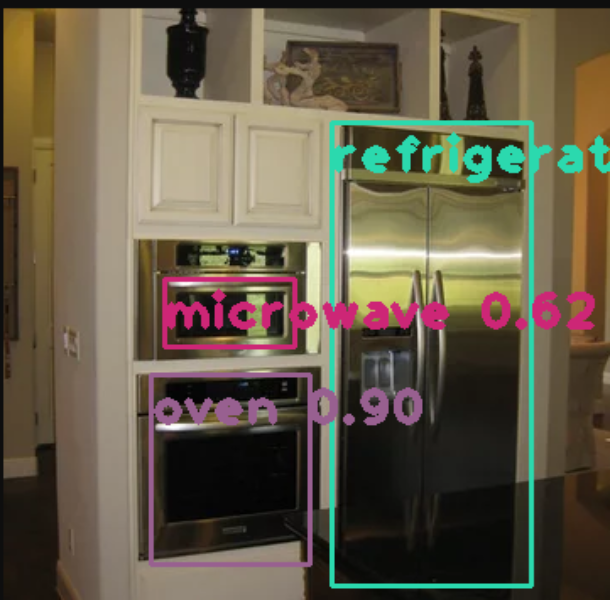

In [25]:
import cv2
import numpy as np
#LOad YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/Colab Notebooks/COCO_project/yolov3.weights", "/content/drive/MyDrive/Colab Notebooks/COCO_project/yolov3.cfg")
classes = []
with open("/content/drive/MyDrive/Colab Notebooks/COCO_project/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i -1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size = (len(classes), 3))

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/COCO_project/oven.png")
# img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

#Non Max Suppression 
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence_text = f"{confidences[i]:.2f}"  # Format the confidence value with 2 decimal points
        label_with_confidence = f"{label} {confidence_text}"  # Combine the label and confidence text
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label_with_confidence, (x, y + 30), font, 2, color, 3)
        # cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
img_resized = cv2.resize(img, (610, 600))

cv2_imshow(img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()